# YANIS TAZI HOMEWORK. 2 DEEP LEARNING SYSTEMS
#### yt1600@nyu.edu

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import copy
import seaborn as sns



In [2]:
plt.rcParams["figure.figsize"] = (15,5)

# Problem 1 - Perceptron

In [3]:
np.random.seed(1)
x_train =np.random.uniform(0, 1,20)
y_train =np.random.uniform(0, 1,20)
label_train = (x_train>y_train).astype('int')
label_train = [1 if l==1 else -1 for l in label_train]
data_train = pd.DataFrame({'x':x_train,'y':y_train,'label':label_train})

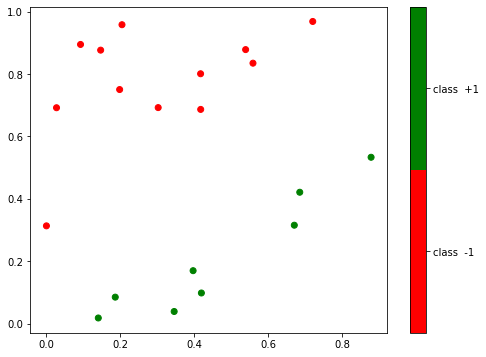

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
colors = ['red','green']

plt.scatter(x_train, y_train, c=label_train, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc =[-0.5,0.5]
cb.set_ticks(loc)
cb.set_ticklabels(['class  -1 ','class  +1'])
#sns.scatterplot(x='x', y='y', hue='label', data=data_train) 
plt.show()


In [11]:
class Perceptron(object):

    def __init__(self, no_of_inputs,a, threshold=100, learning_rate=0.01):
        np.random.seed(17)
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.abs(np.random.normal(size=no_of_inputs + 1))
        self.a = a
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = -1           
        return activation

    def train(self, training_inputs, labels):
        num_updates=0
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                #prediction = self.predict(inputs)
                if(label*(np.dot(inputs, self.weights[1:]) + self.weights[0]) < self.a):
                    num_updates+=1
                    
                    self.weights[1:] += self.learning_rate * label * inputs
                    self.weights[0] += self.learning_rate * label
                else:
                    self.weights[1:] = self.weights[1:]
                    self.weights[0]  = self.weights[0]
        print('Number of weight updates : '+ str(num_updates))

# Create Test set of 1000 points

In [18]:
np.random.seed(37)
x_test =np.random.uniform(0, 1,1000)
y_test =np.random.uniform(0, 1,1000)
label_test = (x_test>y_test).astype('int')
label_test = [1 if l==1 else -1 for l in label_test]
data_test = pd.DataFrame({'x':x_test,'y':y_test,'label':label_test})

# a = 0

In [19]:
# Train perceptron for a = 0 :
perceptron = Perceptron(no_of_inputs=2,threshold=100,a=0)
perceptron.train(np.array(data_train[['x','y']]), label_train)

list_accuracy = []
for inputs, label in zip(np.array(data_test[['x','y']]), label_test):
    list_accuracy += [perceptron.predict(inputs)==label]
print('Accuracy for a = 0 :')
list_accuracy.count(True)/len(list_accuracy)

Number of weight updates : 291
Accuracy for a = 0 :


0.904

# a = 1

In [20]:
# Train perceptron for a = 1 :

perceptron = Perceptron(no_of_inputs=2,threshold=100,a=1)
perceptron.train(np.array(data_train[['x','y']]), label_train)

list_accuracy = []
for inputs, label in zip(np.array(data_test[['x','y']]), label_test):
    list_accuracy += [perceptron.predict(inputs)==label]
print('Accuracy for a = 0 :')
list_accuracy.count(True)/len(list_accuracy)

Number of weight updates : 1441
Accuracy for a = 0 :


0.935

### 3. As expected , margin based loss have better generalization properties to unseen dataset . With a = 1 , we will obtain a better accuracy . Not only we update the weights more but also we avoid marginal classification by forcing the W.X to be as close as 1 or -1 as possible.

### 4. Based on generalization properties , the hinge loss with a =1 will hopefully not change significantly using a different set of training points